In [1]:
# Libraries
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter, IndexLocator

In [2]:
# Function to run one iteration of the IBP
def IBP(customers, alpha):
    
    # Rename inputs
    n = customers
    a = alpha
    
    # Generate first row
    x0 = np.random.poisson(a)
    
    # Create output matrix (rows fully realized)
    xs = np.zeros(shape=(n,x0)).astype(int)
    
    # Set first row of output matrix to 1s from first row
    xs[0,:] = 1
    
    # Generate new row for each customer
    for i in range(2, n+1):
        
        # Sample old dishes
        old_dish_counts = np.sum(xs, axis=0)
        p = old_dish_counts/i
        xs[i-1,:] = np.random.binomial(1, p, len(p)).astype(int)
        
        # Sample new dishes
        new_dish_count = np.random.poisson(a/i)
        xs = np.concatenate((xs, np.zeros(shape=(n, new_dish_count)).astype(int)), axis=1)
        xs[i-1, len(p):len(p)+new_dish_count] = 1
        
    
    # Return final dataframe
    return xs

In [3]:
# Function to create (pretty) IBP plot
def plot_IBP(xs):
    fig, ax = plt.subplots(figsize=(8,8))
    plt.imshow(xs, interpolation = "none", cmap = "Greys", aspect = 1, alpha = 0.8)
    ax.set_title("Example IBP")
    ax.grid(True, which="major", color="grey", linewidth=0.5)
    ax.xaxis.set_major_locator(IndexLocator(1, 0))
    ax.yaxis.set_major_locator(IndexLocator(1, 0))
    ax.xaxis.set_major_formatter( NullFormatter() )
    ax.yaxis.set_major_formatter( NullFormatter() )
    ax.xaxis.set_ticks_position("none")
    ax.yaxis.set_ticks_position("none")

In [4]:
# Run example IBP
customers = 20
alpha = 7
xs = IBP(customers, alpha)

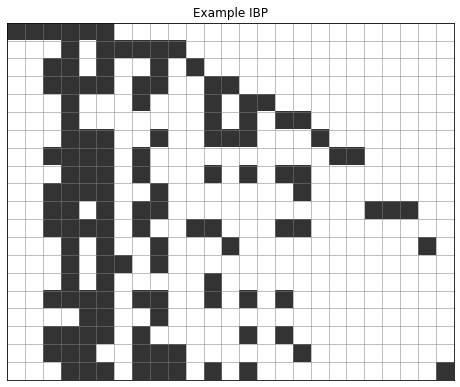

In [5]:
# Plot example IBP
plot_IBP(xs)

In [6]:
# Function to sort rows of binary matrix by their binary value
def sort_bin(b):
    b_view = np.ascontiguousarray(b).view(np.dtype((np.void, b.dtype.itemsize * b.shape[1])))
    return b[np.argsort(b_view.ravel())]

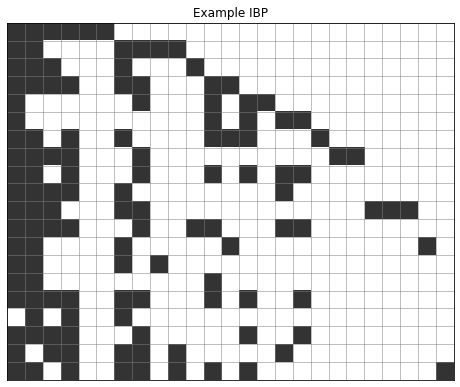

In [7]:
# Sort columns of binary matrix by transposing and using sort_bin,
# transposing again and reversing
plot_IBP(sort_bin(xs.T).T[:, ::-1])

In [8]:
# More examples
# xs = [xs[:, np.random.permutation(xs.shape[1])], sort_bin(xs.T).T[:, ::-1]]
xs = [xs, sort_bin(xs.T).T[:, ::-1]]

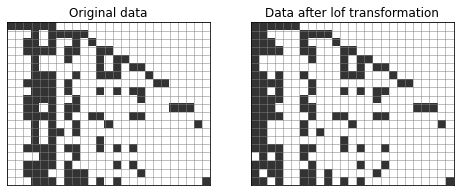

In [9]:
# Plot examples
fig, ax = plt.subplots(1, 2, figsize=(8,4))
titles = ["Original data", "Data after lof transformation"]
for i in range(len(xs)):
    ax[i].imshow(xs[i], interpolation = "none", cmap = "Greys", aspect = 1, alpha = 0.8)
    ax[i].set_title(titles[i])
    ax[i].grid(True, which="major", color="grey", linewidth=0.5)
    ax[i].xaxis.set_major_locator(IndexLocator(1, 0))
    ax[i].yaxis.set_major_locator(IndexLocator(1, 0))
    ax[i].xaxis.set_major_formatter( NullFormatter() )
    ax[i].yaxis.set_major_formatter( NullFormatter() )
    ax[i].xaxis.set_ticks_position("none")
    ax[i].yaxis.set_ticks_position("none")
plt.savefig("lof_IBP", bbox_inches="tight")